<a href="https://colab.research.google.com/github/danlichter096/AI-Fall21/blob/main/HW2_Hello_Jupyter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Daniel Lichter Hello Jupyter

## Calculations

For my Hello Jupyter-First Notebook, I will solve the Taylor polynomials centered at 0, $T_n(x) = \sum \limits _{k = 0} ^{n} \dfrac {f^{(k)}(0)}{k!}(x)^k $ for $f = cos(x)$ for each value of $x \in \{\dfrac{1}{10},\dfrac{2}{10},\dfrac{3}{10},\dfrac{4}{10} \}$ which is equivalent to $x=\dfrac{j}{10}$, for $j$ = 1,2,3,4.

This calculation requires taking the derivative of $f = cos(x)$ which can be done using sympy's .diff() and .subs() functions.

In [1]:
from sympy import Symbol, cos

I will also use the cosine function from numpy and the factorial function from the math module.

In [2]:
import numpy
from math import factorial, pi

To do calculate the Taylor polynomial, I will create a taylor_poly( ) function. This function will have inputs n which is where the summation ends and x which is the value we are trying to calculate. The function will calculate and return the sum of the Taylor Polynomial. 

In [3]:
def taylor_poly(x,n):
    t_sum = 0
    x0 = Symbol('x')
    y = cos(x0)
    for k in range(n+1):
        t_sum += (y.diff(x0,k).subs(x0,0)/factorial(k))*pow(x,k)
    return t_sum

At this point, for each value of $j$, we want to find the smallest integer n such that $\lvert T_n(\dfrac{j}{10}) - cos(\dfrac{j}{10})  \rvert < 10^{-12} $. To get this, I will create a smallest_n() function that loops through the values of j and calculates the smallest n for each j that satisfies that condition. I will multiply j by pi so we can get the value in degrees instead of radians. The function returns a list of lists containing the data calculated from the two functions. The multi-dimensional list will make it easier to visualize the data.

In [4]:
def smallest_n():
    val = []
    for j in range(1,10):
        n = 0
        f_x = cos(j/10)
        while(abs(taylor_poly(j/10,n)-f_x)>pow(10,-12)):
            n+=1
        val.append([j,j/10,n,taylor_poly(j/10,n), numpy.cos(j/10), abs(taylor_poly(j/10,n)-f_x),
                    abs(taylor_poly(j/10,n)-f_x)/f_x, (pow((j/10),n+1)/factorial(n+1))]) #j, x, n, taylor, actual, error for Taylor, absolute error, rel
    return val
taylor_sums = smallest_n()

The one variable that the function returns is the remainder bound calculated by taking the max value of $f^{n+1}(z)$ which for cos(x) is 1. and then calculating this equation $\dfrac {(1)(x)^{n+1}}{(n+1)!} = \dfrac {x^{n+1}}{(n+1)!}$.

Next, I will take the list from the smallest_n() function and put it into a panda DataFrame so that we can see the values nicely in a table and be able to plot and analyze the data. 

In [5]:
import pandas as pd
taylor_df = pd.DataFrame(taylor_sums, columns = ('J', 'X', 'n', 'Calculated Taylor Polynomial', 'Exact Value', 'Absolute Error', 'Relative Error', 'Remainder Bound'))
taylor_df

,J,X,n,Calculated Taylor Polynomial,Exact Value,Absolute Error,Relative Error,Remainder Bound
0,1,0.1,6,0.995004165277778,0.995004,2.47912801398797e-13,2.49157551345049e-13,1.984127e-11
1,2,0.2,8,0.980066577841270,0.980067,2.81996648254790e-14,2.87732134357580e-14,1.410935e-12
2,3,0.3,10,0.955336489125605,0.955336,1.11022302462516e-15,1.16212772909084e-15,4.437906e-14
3,4,0.4,10,0.921060994002850,0.921061,3.50830475781549e-14,3.80898201167827e-14,1.050762e-12
4,5,0.5,10,0.877582561889864,0.877583,5.09037256790634e-13,5.80044862894875e-13,1.223247e-11
5,6,0.6,12,0.825335614909687,0.825336,8.99280649946377e-15,1.08959389816807e-14,2.097423e-13
6,7,0.7,12,0.764842187284566,0.764842,7.76045894212984e-14,1.01464839036700e-13,1.555945e-12
7,8,0.8,12,0.696706709347669,0.696707,5.03153074760121e-13,7.22187784342697e-13,8.828553e-12
8,9,0.9,14,0.621609968270656,0.621610,8.77076189453874e-15,1.41097510371966e-14,1.574483e-13


# Discussion

Looking at the table, we can see the values of the calculated sum, the exact value, and 3 different types of errors. As seen in the table, n increases by 2 for j = {1,2,3} but then stays at 10 for j = 4. Even though it wasnt necessary, I increased the values of j to see if the n stays the same for larger values of j (or x). Additionally, the calculated value of cos(x) decreases as x gets larger which makes sense because cos(x) ranges from [-1,1] and starts at 1 and decreases until $\dfrac {\pi}{2} $ is reached.

First I want to look at if there is any correlation between the absolute error and x.  

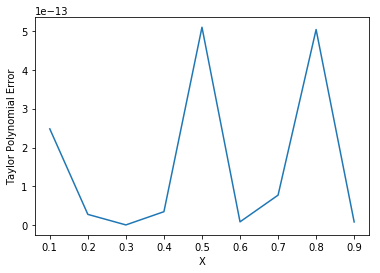

In [6]:
import matplotlib.pyplot as plt
plt.plot(taylor_df['X'],taylor_df['Absolute Error'])
plt.xlabel('X')
plt.ylabel('Taylor Polynomial Error')
plt.show()

From the graph above, it is quite clear to see that there is no correlation between X and the Absolute error.

Next, I want to plot the calculated value and each of the errors to compare the 3 error bounds.

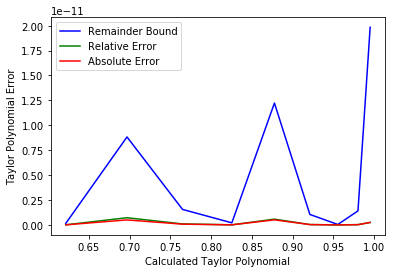

In [7]:
plt.plot(taylor_df['Calculated Taylor Polynomial'],taylor_df['Remainder Bound'],'b-')
plt.plot(taylor_df['Calculated Taylor Polynomial'],taylor_df['Relative Error'],'g-')
plt.plot(taylor_df['Calculated Taylor Polynomial'],taylor_df['Absolute Error'],'r-')
plt.xlabel('Calculated Taylor Polynomial')
plt.ylabel('Taylor Polynomial Error')
plt.legend()
plt.show()

And I will do the same with the exact value and the three errors.

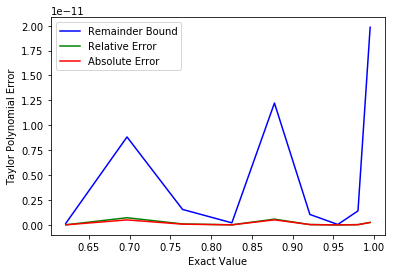

In [8]:
plt.plot(taylor_df['Exact Value'],taylor_df['Remainder Bound'],'b-')
plt.plot(taylor_df['Exact Value'],taylor_df['Relative Error'],'g-')
plt.plot(taylor_df['Exact Value'],taylor_df['Absolute Error'],'r-')
plt.xlabel('Exact Value')
plt.ylabel('Taylor Polynomial Error')
plt.legend()
plt.show()

As expected the graphs look the same, yet I thought it would be helpful to visualize it.

## Conclusion

Comparing our error bounds to the error bounds for taylor polynomial, you can see that the Remainder bound is  larger than relative error or absolute error for every value. This happens because we choose the maximum value of cos(x) to represent the largest possible error. We choose the largest possible error because we want to assume the worst case possible to tell how far away we are from the exact value.

Through my calculations, I have proven the remainder theorem and shown that for all values of x, $\lvert R_n(x)\rvert ≤ \dfrac {max_z\lvert f^{n+1}(Z)\rvert}{(n+1)!}\lvert x-a\rvert^{n+1}$

I hope this AI meme gets me a nice arbitrary brownie point!

<img src="giphy.gif" width="750" align="center">